In [43]:
import pandas as pd
df_matches = pd.read_csv("matches.csv")
df_matches.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [44]:
df_deliveries = pd.read_csv("deliveries.csv")
df_deliveries.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


## Data Cleaning

In [45]:
print(df_matches.columns)
print(df_deliveries.columns)

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')
Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In matches data frame columns like umpire1,umpire2,umpire3 are not useful because these days they are using technology. So we cant decide which umpire is more useful for predicting anything related to match.

Date is also not useful because we already have season column which is also almost equal to date.

City and venue also not important features for this year IPL. Because IPL2020 is happening in UAE, only 2014 ipl was happened in UAE that to half season.

As far as my cricket knowledge is concern most important feature related to players is how many runs batsman scored against particular team and how many wickets bowler taken against particular team.

So when it comes to today questions first 2 are related to matches dataset and next 3 are related to deliveries dataset.


In [46]:
df_matches = df_matches.drop(['city','venue','date','umpire1','umpire2','umpire3'], axis = 1) 
df_matches.head(2)

,id,season,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh
1,2,2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith


In [47]:
print(df_matches["team1"].value_counts())

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64


In [48]:
#In 2019 delhi dareevils name changed to delhi capitals. So i am replacing old name with new name for all the rows.
df_matches = df_matches.replace(to_replace ="Delhi Daredevils", value = "Delhi Capitals") 

df_deliveries = df_deliveries.replace(to_replace = "Delhi Daredevils", value = "Delhi Capitals")

In [49]:
# We are predicting results of the match between Mumbai and delhi. So i am taking only rows which has delhi or mumabi from team1 and team2 columns.
df_matches = df_matches[(df_matches['team1'] == 'Mumbai Indians') | (df_matches['team1'] == 'Delhi Capitals') | 
                        (df_matches['team2'] == 'Mumbai Indians') | (df_matches['team2'] == 'Delhi Capitals')]

df_deliveries = df_deliveries[(df_deliveries['batting_team'] == 'Mumbai Indians') | (df_deliveries['batting_team'] == 'Delhi Capitals') |
                              (df_deliveries['batting_team'] == 'Mumbai Indians') | (df_deliveries['batting_team'] == 'Delhi Capitals')]
df_matches.head(2)

,id,season,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
1,2,2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith
4,5,2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav


Now i am considering only matches dataset for predicting first 2 questions.

In [50]:
#checking null values
print(df_matches.isnull().sum())

id                 0
season             0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             2
win_by_runs        0
win_by_wickets     0
player_of_match    2
dtype: int64


In [51]:
#printing null rows 
df1 = df_matches[df_matches.isna().any(axis=1)]
df1.head()

,id,season,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
300,301,2011,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,no result,0,NaN,0,0,NaN
570,571,2015,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN


In [52]:
#After seeing above table we can clearly understood that 2 matches are not played beacuse of rain, badlight or pitch condition. 
#So i am replacing those null values in winner column with no result and palyer of the match column null values with not declared.
df_matches["winner"].fillna("No result", inplace = True)
df_matches['player_of_match'].fillna("Not declared", inplace = True)

In [62]:
#deliveries dataset also has null values but for this problem i am replacing only player_dismissed column null values
df_deliveries["player_dismissed"].fillna("No wicket", inplace = True)

## Data Analyzing and Visualization

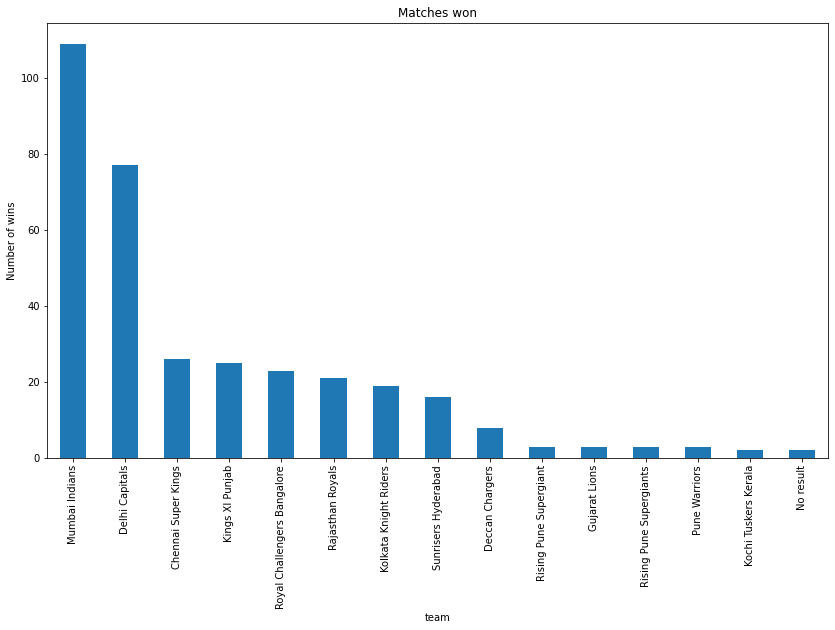

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = df_matches['winner'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Matches won")
ax.set_xlabel("team")
ax.set_ylabel("Number of wins")
plt.show()

Here i am not comparing only Delhi VS Mumbai matches. I am comparing all the MI and DC matches in IPL. Mumbai won more matches than delhi in ipl till 2019.

In [54]:
df_matches['toss_decision'].value_counts()

field    202
bat      138
Name: toss_decision, dtype: int64

By looking at abovre observations, Most of the teams looking to chase the target. But as for this year ipl most of teams looking to bat first.

In [73]:
#Runs scored by rohit sharma against all opposition for mumbai indians(Note: Rohit played for Deccan chargers for first 3ipl seasons)
df_rohit_all = df_deliveries[(df_deliveries['batsman'] == 'RG Sharma')]

print("Balls faced by Rohit sharma against all oppositions : " , df_rohit_all.shape[0])
print("Rohit sharma runs against all oppositions for Mumbai indians : " , df_rohit_all['batsman_runs'].sum())
# print("Rohit sharma avarage against all oppositions for Mumbai indians", df_rohit_all['batsman_runs'].sum()/df_rohit.shape[0])

#Runs scored by rohit sharma against delhi capitals
df_rohit_dc = df_deliveries[(df_deliveries['batsman'] == 'RG Sharma') & (df_deliveries['bowling_team'] == 'Delhi Capitals')]
print("Rohit sharma runs against Delhi Capitals for Mumbai indians : " , df_rohit_dc['batsman_runs'].sum())
# print("Rohit sharma avarage against Delhi capitals for Mumbai indians", df_rohit_dc['batsman_runs'].sum()/df_rohit_dc.shape[1])

Balls faced by Rohit sharma against all oppositions :  2907
Rohit sharma runs against all oppositions for Mumbai indians :  3744
Rohit sharma runs against Delhi Capitals for Mumbai indians :  563


In [68]:
df_rabada_all = df_deliveries[(df_deliveries['bowler'] == 'K Rabada') & (df_deliveries['player_dismissed'] != 'No wicket')]
# df_rabada_all.head()
print("Number of wickets rabada took against delhi capitals : ", df_rabada_all.shape[1])

Number of wickets rabada took against delhi capitals :  21


In [74]:
# df_wideballs = df_deliveries[(df_deliveries['wide'] == 'RG Sharma') & (df_deliveries['bowling_team'] == 'Delhi Capitals')]
df_deliveries['wide_runs'].sum()


1709

Both teams conceeded 1709 wide runs till now in ipl

Actually for today match i am not using any predictive modeling(Machine learning). 

It taken some time for cleaning data, So from tomorrow onwards i will use much more complcated techniques to predict results.